In [11]:

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import plotly.express as px
import plotly.graph_objects as go
rdata = pd.read_csv("Corporate_Energy_Consumption.csv")

for col in rdata.columns:
    print(col + ": " + str(rdata[col].dtype))

Business Unit Desc: object
FacilityName: object
Site ID: object
FacilityAddress: object
Energy Description: object
Year: int64
Month: object
Total Consumption: int64
Unit: object


FacilityName,02F201 - INLAND ATHLETIC PARK,10B787 - ELLISTON PARK,17 AV & 1 ST SW PEDESTRIAN LIGHTING,17 AV & 14 ST SW PEDESTRIAN LIGHTING,17 AV & 8 ST SW PEDESTRIAN LIGHTING,17 AV & MACLEOD TR SE PEDESTRIAN LIGHTING,19 ST DEPOT,200 6704 6 ST SW HOUSING,210 15 AV NE HOUSING,3 ST BARCLAY MALL,...,WSP002,WSP016,WSP019,WSP028,WSP033,WSP034,WSP037,WSP494,WSP497,WSP498
Year,,,,,,,,,,,,,,,,,,,,,
2014,22364.0,17073.0,NaN,NaN,NaN,NaN,6148.0,NaN,NaN,393834.0,...,63.0,63.0,NaN,348.0,82.0,63.0,63.0,1.0,113.0,63.0
2015,18143.0,14513.0,NaN,NaN,NaN,NaN,5389.0,NaN,NaN,407948.0,...,63.0,63.0,NaN,342.0,76.0,63.0,63.0,1.0,14.0,63.0
2016,21917.0,12529.0,NaN,NaN,NaN,NaN,5514.0,31635.0,19891.0,431048.0,...,63.0,91.0,NaN,353.0,74.0,63.0,63.0,1.0,7.0,63.0
2017,23517.0,17109.0,NaN,NaN,NaN,NaN,6921.0,61285.0,33042.0,444475.0,...,NaN,NaN,36.0,357.0,82.0,NaN,NaN,1.0,14.0,NaN
2018,29756.0,16280.0,NaN,NaN,NaN,NaN,2969.0,24591.0,NaN,411729.0,...,NaN,NaN,136.0,332.0,69.0,NaN,NaN,NaN,13.0,NaN
2019,20258.0,12047.0,NaN,NaN,NaN,NaN,4929.0,NaN,NaN,388338.0,...,NaN,NaN,132.0,344.0,3856.0,NaN,NaN,NaN,8.0,NaN
2020,21806.0,8309.0,642.0,NaN,15396.0,NaN,6458.0,NaN,NaN,318571.0,...,NaN,NaN,132.0,357.0,6370.0,NaN,NaN,NaN,NaN,NaN
2021,19254.0,5132.0,525.0,8434.0,501.0,6548.0,3862.0,NaN,NaN,201338.0,...,NaN,NaN,91.0,230.0,799.0,NaN,NaN,NaN,7.0,NaN


<Figure size 259200x259200 with 0 Axes>

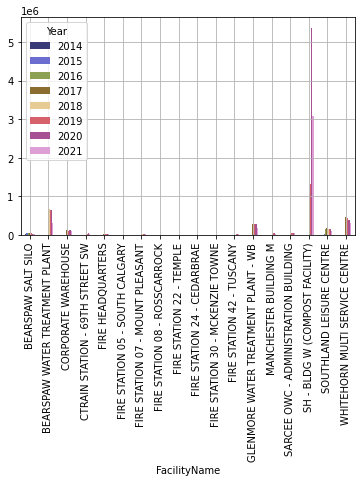

Year,2014,2015,2016,2017,2018,2019,2020,2021
FacilityName,,,,,,,,
4 CORNERS OFFICE BUILDING,NaN,NaN,NaN,NaN,NaN,NaN,247.0,437.0
52 ST EAST AREA OFFICE,437.0,414.0,402.0,292.0,262.0,314.0,311.0,178.0
66 ST DEPOT,116.0,90.0,86.0,102.0,102.0,18.0,NaN,NaN
90 AV DEPOT,526.0,488.0,426.0,424.0,418.0,459.0,437.0,233.0
ACADIA AQUATIC AND FITNESS CENTRE,6122.0,6452.0,6578.0,5284.0,5650.0,6091.0,3245.0,1966.0
...,...,...,...,...,...,...,...,...
WESTWINDS POLICE CAMPUS - EAST BUILDING,29074.0,26200.0,27445.0,30474.0,25071.0,24369.0,20988.0,13505.0
WESTWINDS POLICE CAMPUS - WAREHOUSE,NaN,NaN,2824.0,3491.0,3821.0,3803.0,4025.0,2421.0
WESTWINDS POLICE CAMPUS - WEST BUILDING,23588.0,22264.0,21598.0,22284.0,24547.0,17386.0,12810.0,8098.0


<Figure size 259200x259200 with 0 Axes>

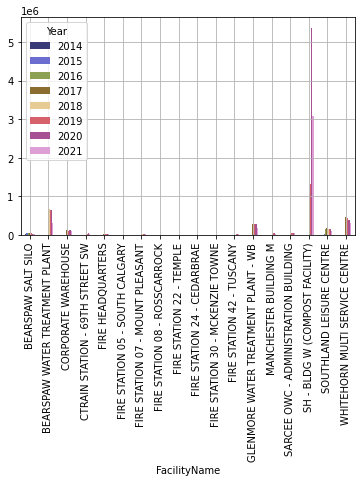

Year,2014,2015,2016,2017,2018,2019,2020,2021
FacilityName,,,,,,,,
BEARSPAW SALT SILO,31758.0,54302.0,53631.0,42756.0,22981.0,45727.0,23335.0,26322.0
BEARSPAW WATER TREATMENT PLANT,NaN,NaN,NaN,9791.0,678536.0,652587.0,635422.0,303027.0
CORPORATE WAREHOUSE,NaN,NaN,229.0,132569.0,115763.0,103240.0,132935.0,95881.0
CTRAIN STATION - 69TH STREET SW,NaN,NaN,1436.0,350.0,19507.0,34891.0,41160.0,28126.0
FIRE HEADQUARTERS,NaN,NaN,NaN,16602.0,17848.0,17954.0,19166.0,12960.0
FIRE STATION 05 - SOUTH CALGARY,NaN,1794.0,5159.0,5302.0,5272.0,4259.0,4268.0,2759.0
FIRE STATION 07 - MOUNT PLEASANT,NaN,NaN,NaN,2971.0,25943.0,32719.0,34678.0,25033.0
FIRE STATION 08 - ROSSCARROCK,NaN,415.0,1166.0,1235.0,1236.0,1183.0,1157.0,785.0
FIRE STATION 22 - TEMPLE,265.0,NaN,1226.0,1795.0,1824.0,1753.0,1797.0,1187.0


<Figure size 259200x259200 with 0 Axes>

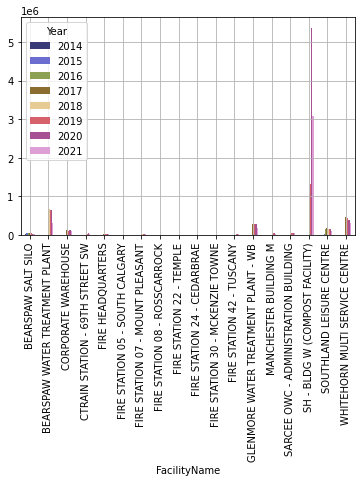

In [12]:
df = pd.DataFrame(rdata,columns=["Business Unit Desc","FacilityName","Site ID", "FacilityAddress","Energy Description",
                                 "Year","Month","Total Consumption","Unit"])
df1=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df1 = df1.loc[df1['Energy Description'] == 'Electricity']
df1=df1.loc[df1['Total Consumption'] > 0]
df1=df1.loc[df1['Year'].between(2014,2021)]
df1.name = "Electricity Usage of each Year "
df1=df1.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=0)
display(df1)

fig = plt.figure()
df3.plot(kind='bar', colormap='tab20b', grid=True)
fig.set_size_inches(3600,3600)
plt.show()

df2=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df2= df2.loc[df2['Energy Description'] == 'Natural Gas']
df2 =df2.loc[df2['Total Consumption'] > 0]
df2 =df2.loc[df2['Year'].between(2014,2021)]
df2.name = "Natual Gas Usage of each Year "
df2=df2.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=1)
display(df2)

fig = plt.figure()
df3.plot(kind='bar', colormap='tab20b', grid=True)
fig.set_size_inches(3600,3600)
plt.show()


df3=pd.DataFrame.drop(rdata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df3 = df3.loc[df3['Energy Description'] == 'Solar Power']
df3=df3.loc[df3['Total Consumption'] > 0]
df3=df3.loc[df3['Year'].between(2014,2021)]
df3.name = "Solar Power Usage of each Year "
df3=df3.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=1)

display(df3)

fig = plt.figure()
df3.plot(kind='bar', colormap='tab20b', grid=True)
fig.set_size_inches(3600,3600)
plt.show()


